Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Необходимо на имеющихся данных обучить модель для определения факта оттока клиента и сделать рекомендации отделу маркетинга для стратегии взаимодействия с пользователями и их удержания.  

Набор данных включает следующие поля:
* 'Churn' — факт оттока в текущем месяце;
* Текущие поля в датасете:  
 * Данные пользователя за предыдущий до проверки факта оттока месяц:
   * 'gender' — пол
   * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
   * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
   * Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
   * 'Phone' — наличие контактного телефона
   * 'Age' — возраст
   * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
 * 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
 * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
 * 'Group_visits' — факт посещения групповых занятий
 * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
 * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
 * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузим-данные." data-toc-modified-id="Загрузим-данные.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузим данные.</a></span></li><li><span><a href="#Посмотрим-информацию-о-датасете." data-toc-modified-id="Посмотрим-информацию-о-датасете.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Посмотрим информацию о датасете.</a></span></li><li><span><a href="#Построим-модель-прогнозирования-оттока-пользователей." data-toc-modified-id="Построим-модель-прогнозирования-оттока-пользователей.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построим модель прогнозирования оттока пользователей.</a></span></li><li><span><a href="#Сделаем-кластеризацию-пользователей." data-toc-modified-id="Сделаем-кластеризацию-пользователей.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сделаем кластеризацию пользователей.</a></span></li><li><span><a href="#Сформулируем-выводы-и-сделаем-базовые-рекомендации-по-работе-с-клиентами." data-toc-modified-id="Сформулируем-выводы-и-сделаем-базовые-рекомендации-по-работе-с-клиентами.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами.</a></span></li></ul></div>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 150)

## Загрузим данные.

In [ ]:
df = pd.read_csv('')


## Посмотрим информацию о датасете.

In [ ]:
# Для вывода общей информации применим функцию info_output
def info_output(data):
 
   print('Информация о датасете')
   display(data.shape)
   print('----------------------------------------------------')
   display(data.info())
   print('----------------------------------------------------')
   print('Первые строки датасета')
   display(data.head())
   print('----------------------------------------------------')
   print('Количество пропусков по столбцам')
   display(data.isna().sum())
   print('----------------------------------------------------')
   print('Количество дубликатов: {0:.0f}'.format(data.duplicated().sum()))
   print('Доля дубликатов: {0:.3%}'.format((data.duplicated().sum()/len(data))))
   print('----------------------------------------------------')
   print('Статистическая информация')
   display(data.describe())
         

В представленном датасете 14 столбцов и 4000 строк, пропуски в данных отсутствуют, дубликатов нет. Столбцы Avg_additional_charges_total, Month_to_end_contract, Avg_class_frequency_total, Avg_class_frequency_current_month в формате float64, остальные в формате int64.  
* По гендерному признаку информация распределена примерно одиноково, среднее значение 0,51  
* Примерно 84% клиентов проживают или работают в районе расположения фитнес центра. 
* Почти 49% являются сотрудниками компаний-партнёров клуба.  
* Почти 31% клиентов использовали промо-код от знакомого при оплате первого абонемента.  
* У 90% клиентов записан контактный телефон.  
* 25% клиентов имеют абонементы длительностью более 6 месяцев.  
* 41% клиентов посещают групповые занятия.  
* Минимальный возраст клиентов 18 лет, максимальный 41 год, средний возраст 29 лет (он же и медианный), 50% клиентов в возрасте от 27 до 31 года.  
* Минимальная выручка от других услуг фитнес центра 0,148 максимальная 552,590.  
* Минимальный срок до окончания текущего действующего абонемента 1 месяц, максимальный 12 месяцев, медианное значение срока 1 месяц, 25% абонементов заканчиваются в срок более 6 месяцев.  
* Минимальное время с момента первого обращения в фитнес-центр 0 месяцев, максимальное 31 месяц, 50% клиентов посещали фитнес-центр более 3 месяцев.  
* Минимальная средняя частота посещений в неделю за все время с начала действия абонемента 0 раз (кто-то купил абонемент, но еще ни разу не использовал его), максимальная 6,02, в среднем клиенты посещают фитнес-центр 1,879 раз в неделю.  
* Минимальная средняя частота посещений в неделю за предыдущий месяц 0 раз, максимальная 6,147, в среднем за предыдущий месяц фитнес-центр посещали 1,767 раз в неделю.  
* В текущем месяце ушли 26% клиентов.

In [ ]:
# Приведем названия столбцов к нижнему регистру.
df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]

In [ ]:
# посчитаем средние значения признаков в группах оставшихся клиентов и оттока
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


* По гендерному признаку информация распределена примерно одинаково в обоих группах, среднее значение 0,51
* В группе тех кто остался примерно 87% клиентов проживают или работают в районе расположения фитнес центра. В группе оттока 76% клиентов проживают или работают в районе расположения фитнес центра.
* Почти 53% являются сотрудниками компаний-партнёров клуба в группе оставшихся, в группе оттока 35%.
* Почти 35% клиентов использовали промо-код от знакомого при оплате первого абонемента в группе оставшихся, в группе оттока 18%.
* У 90% клиентов записан контактный телефон, равное соотношение по группам.
* Среднее значение длительности абонемента в группе оставшихся 5,747 мес, в группе оттока 1,728 мес.
* 46% клиентов группы оставшихся посещают групповые занятия, в группе оттока почти 27%.
* Средний возраст клиентов группы оставшихся почти 30 лет, группы оттока почти 27 лет.
* Средняя выручка от других услуг фитнес центра от клиентов группы оставшихся 158,44, от клиентов группы оттока 115,08.
* Средний срок до окончания текущего действующего абонемента в группе оставшихся клиентов 5,28 мес, в группе оттока 1,66 мес.
* Среднее время с момента первого обращения в фитнес-центр клиентов группы оставшихся 4,71 мес, группы оттока 0,99 мес.
* Средняя частота посещений фитнес-центра в неделю за все время с начала действия абонемента клиентов из группы оставшихся 2,02 раза, клиентов группы оттока 1,47 раза. 
* Средняя частота посещений фитнес-центра в неделю частота посещений в неделю за предыдущий месяц клиентов из группы оставшихся 2,02 раза, клиентов группы оттока 1,44 раза. 

Можно сделать предварительный вывод: прекращают посещение фитнес-центра чаще клиенты не являющиеся сотрудниками компаний-партнеров, не использовавшие промокод от знакомого при оплате первого абонемента, приобретавшие абонемент средней длительностью 1,72 мес, со средним сроком окончания абонемента 1,66 мес, посещающие фитнес-центр в среднем около месяца, не более 1,47 раз в неделю в среднем.

Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)


In [ ]:
# функция для постройки графиков
# на вход принимает датасет, столбец для группировки, список столбцов датасета
def distr_attribut (data, colum_grop, colum):
  plt.figure(figsize=(20,20)) # задаем размер сетки графиков
  a=0                         # переменная для подсчета итераций
  data_1 = data.copy()[colum] # копия датасета
  for i in colum: # цикл "пробегает" по столбцам датасета
    a+=1          # к переменной счетчика прибавляем 1 на каздой итерапции
    if i == colum_grop: continue # если столбец равен столбцу для группировки, то пропускаем его
    if len(data_1[i].unique()) < 10: # для дискретных переменных строим barplot с накоплением
      report = data_1.reset_index().pivot_table(index = i, columns = colum_grop, values = 'index', aggfunc = 'count')
      report.plot(kind = 'bar', stacked = True, alpha = 0.5, ax = plt.subplot(5,3,a))
    else:
      for c in df[colum_grop].unique(): # для непрерывных переменных строим distplot
         sns.distplot(data[data[colum_grop] == c][i], bins=10, label=c, ax = plt.subplot(5,3,a+1))
    plt.title('Распределение признака {}'.format(i))
    plt.legend()
    plt.xticks(rotation=0)
    plt.grid()
  plt.tight_layout()



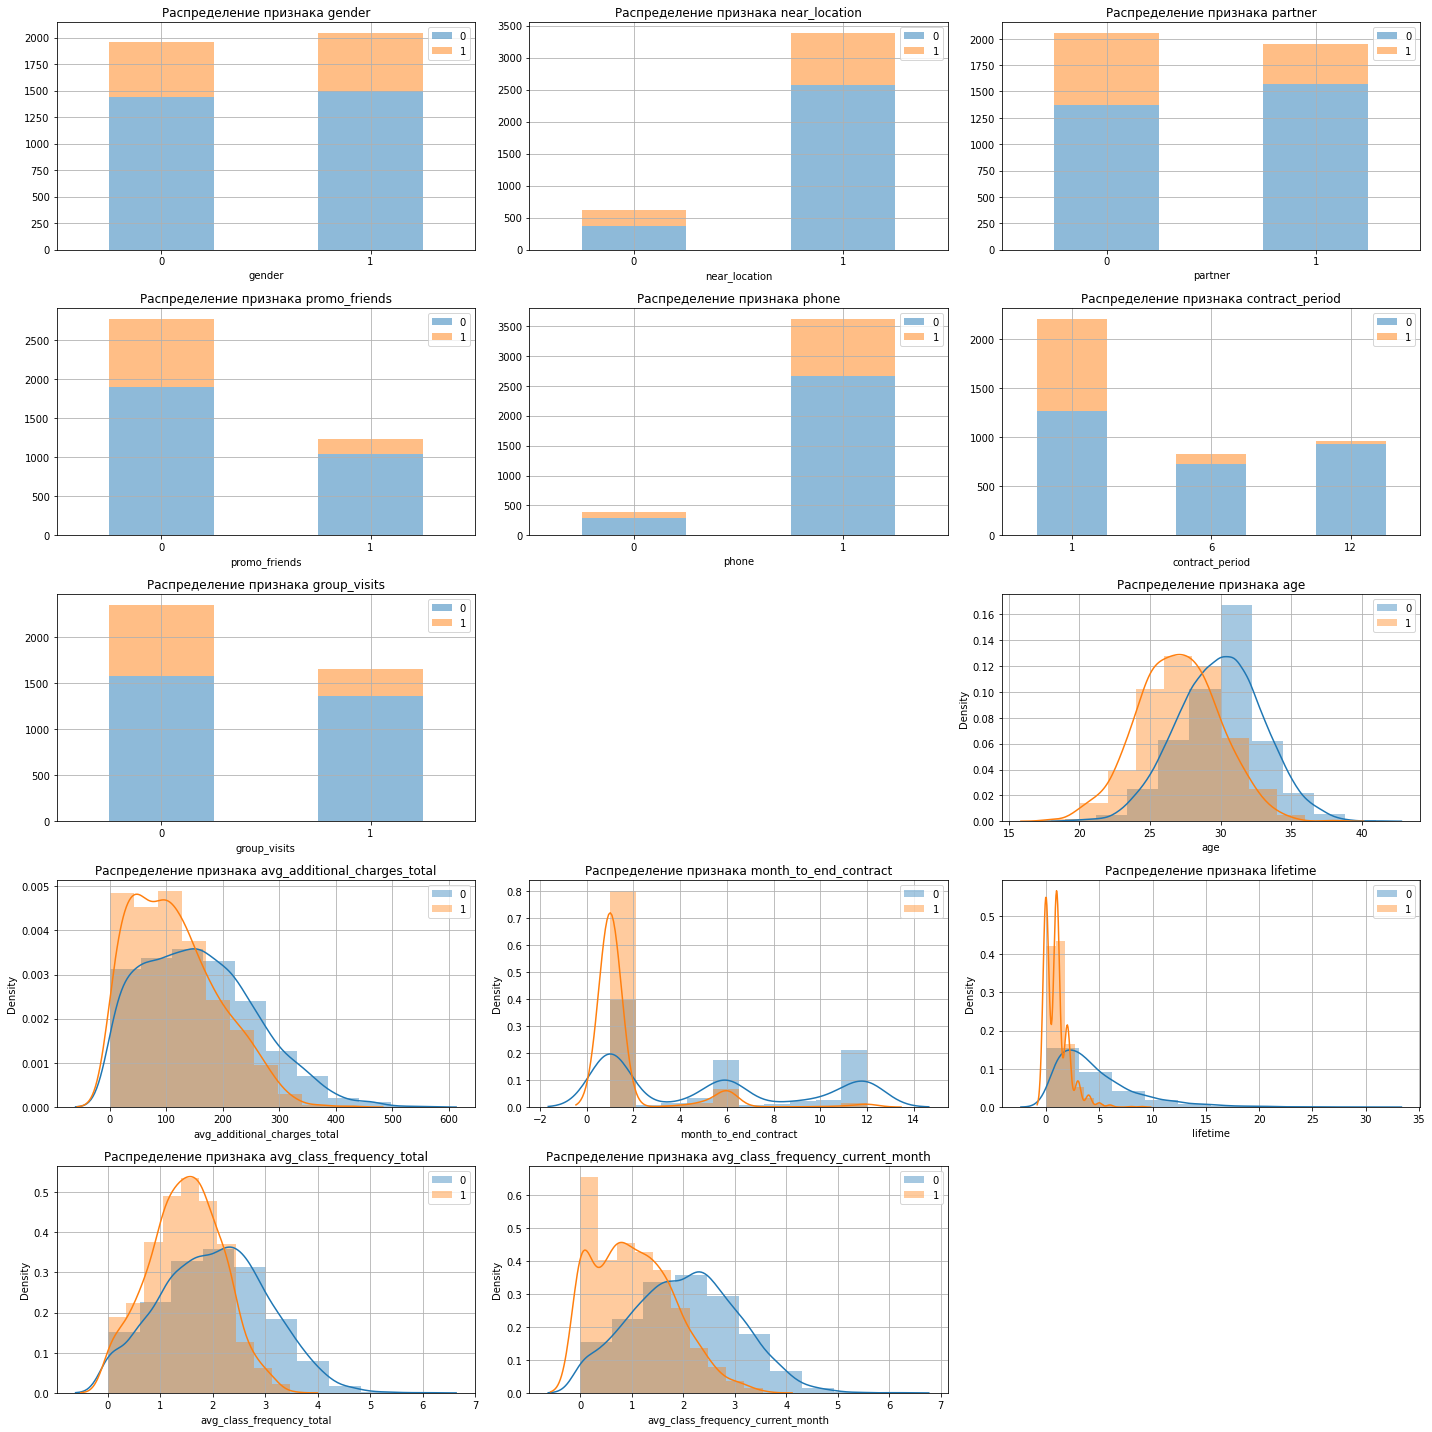

In [ ]:
# построим графики с разделением на группы оставшихся и оттока
distr_attribut (df, 'churn', df.columns)

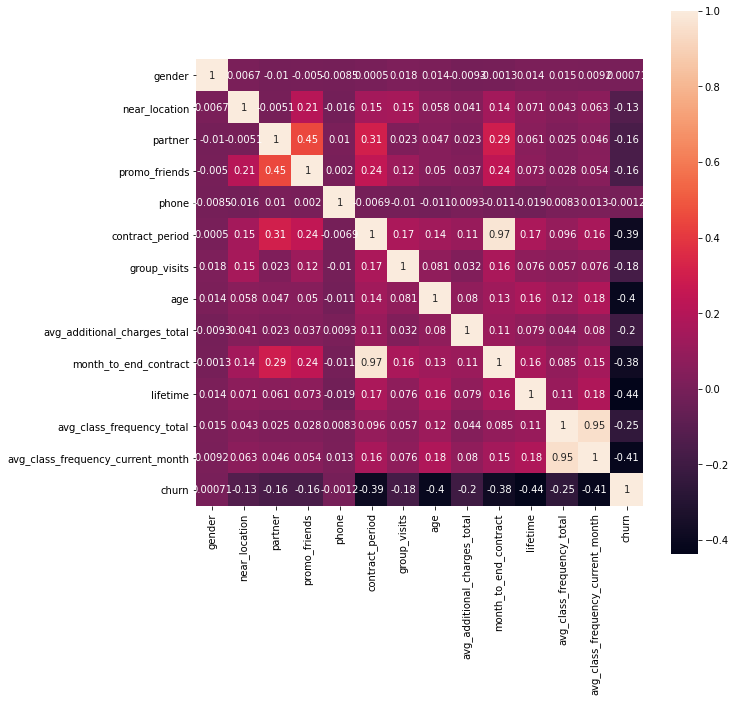

In [ ]:
# построим матрицу корреляций и отобразим её
cc = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cc, annot=True, square=True) #ваш код здесь
ax.set_ylim(14, 0)  
plt.show()

Сильно коррелируют длительность действия текущего абонемента и срок окончания текущего абонемента (0,97), avg_class_frequency_total и avg_class_frequency_current_month средняя частота посещения в неделю и средняя частота посещения в неделю за предыдущий месяц (0,95). Хорошая корреляция между сотрудник компании-партнёра клуба и факт первоначальной записи в рамках акции «приведи друга» (0,45), скорее всего коллеги обменивались промо-кодами.

In [ ]:
#исключим мультиколлинеарность
df = df.drop(columns=['contract_period', 'avg_class_frequency_current_month'])

## Построим модель прогнозирования оттока пользователей.


In [ ]:
# разделяем датасет на матрицу признаков и целевую переменную
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# стандартизируем данные
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и трансформируем матрицу для обучающей выборки
X_test_st = scaler.transform(X_test)

In [ ]:
# создадим список алгоритмов для обучения
models = [
    LogisticRegression(random_state=0),      # логистическая регрессия
    RandomForestClassifier(random_state=0)]  # случайный лес

In [ ]:
# напишем функцию для обучения модели, прогнозирования и вычисления метрик
def prediction_make(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('accuracy:{:.2f} precision:{:.2f} recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score (y_test, y_pred),
            recall_score (y_test, y_pred)))


In [ ]:
# циклом передадим функции make_prediction список алгоритмов
for i in models:
    print(i)
    prediction_make(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0)
accuracy:0.90 precision:0.78 recall:0.81
RandomForestClassifier(random_state=0)
accuracy:0.90 precision:0.80 recall:0.77


Логистическая регрессия и случайный лес имеют хороший показатель правильных ответов 0,9 и 0,89 соответственно. Точность также примерно одинакова, 0,78-регрессия, 0,79-случайный лес, полнота отличается, лучше себя показала логистическая регрессия 0,81 против 0,75 случайным лесом.

## Сделаем кластеризацию пользователей.
Отложим в сторону столбец с оттоком и проведем кластеризацию пользователей:

In [ ]:
# стандартизируем весь набор признаков
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# построим матрицу расстояний
linked = linkage(X_sc, method = 'ward') 

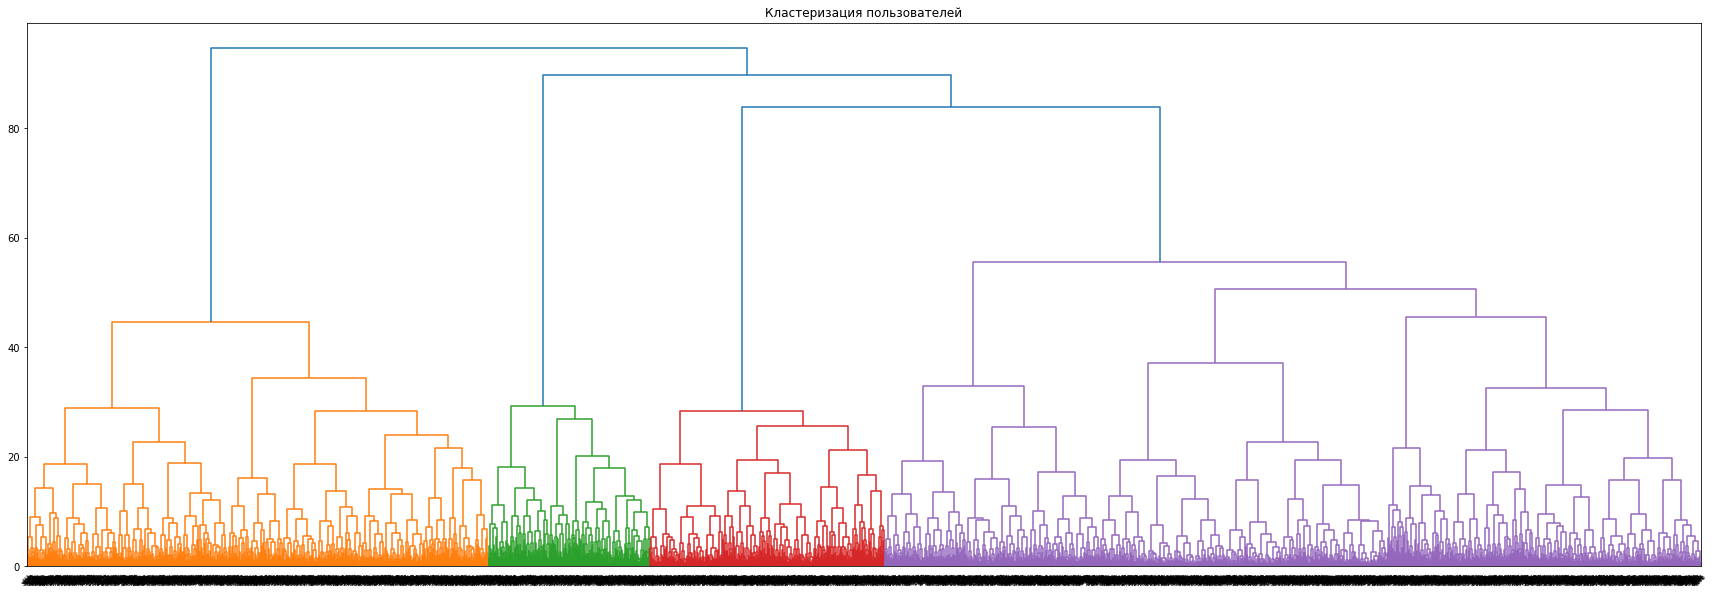

In [ ]:
# построим дендрограмму
plt.figure(figsize=(30, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей')
plt.xticks(rotation=45)
plt.show() 

На дендрограмме четко видны 4 кластера разного цвета. Один из кластеров объемный, разобъем его на два кластера, для расчетов будем применять 5 кластеров. 

In [ ]:
# задаем модель KMeans
km = KMeans(n_clusters=5, random_state=0) # передаем число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
df['clusters'] = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров, сохраняем в столбце clusters


In [ ]:
# посчитаем средние значения признаков в кластерах
df.groupby('clusters').mean()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
clusters,,,,,,,,,,,,
0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


0 кластер: 
  * 99,5% клиентов живут или работают в районе расположения фитнес-центра,
  * 88,9% являются сотрудниками компании-партнёра клуба, 
  * 100% использовали промо-код от знакомого при оплате первого абонемента,
  * 51,9% посещают групповые занятия,
  * средним возрастом 29 лет
  * в среднем тратят 152,14 у.е. на дополнительные услуги,
  * чуть больше 6 месяцев до окончания текущего абонемента, 
  * посещающие фитнес-центр в среднем 4,2 месяца,
  * в среднем посещают занятия 1,95 раз в неделю,
  * 13,2% покинули фитнес-центр в текущем месяце.

1 кластер: 
  * клиенты не живут и не работают в районе расположения фитнес-центра,
  * 48,8% являются сотрудниками компании-партнёра клуба, 
  * 7,7% использовали промо-код от знакомого при оплате первого абонемента,
  * 23,15% посещают групповые занятия,
  * средним возрастом 28 лет
  * в среднем тратят 137,28 у.е. на дополнительные услуги,
  * в среднем 2,8 месяца до окончания текущего абонемента, 
  * посещающие фитнес-центр в среднем 2,9 месяца,
  * в среднем посещают занятия 1,76 раз в неделю,
  * 40,2% покинули фитнес-центр в текущем месяце. 

2 кластер: 
  * 99,5% клиентов живут или работают в районе расположения фитнес-центра,
  * 41,7% являются сотрудниками компании-партнёра клуба, 
  * 1,1% использовали промо-код от знакомого при оплате первого абонемента,
  * 54,7% посещают групповые занятия,
  * средним возрастом 30 лет
  * в среднем тратят 177,1 у.е. на дополнительные услуги,
  * в среднем 6,16 месяца до окончания текущего абонемента, 
  * посещающие фитнес-центр в среднем 5,7 месяца,
  * в среднем посещают занятия 2,32 раз в неделю,
  * 1,6% покинули фитнес-центр в текущем месяце. 

3 кластер: 
  * 100% клиентов живут или работают в районе расположения фитнес-центра,
  * 19,7% являются сотрудниками компании-партнёра клуба, 
  * 5,3% использовали промо-код от знакомого при оплате первого абонемента,
  * 26,7% посещают групповые занятия,
  * средним возрастом 27 лет
  * в среднем тратят 124,62 у.е. на дополнительные услуги,
  * в среднем 6,16 месяца до окончания текущего абонемента, 
  * посещающие фитнес-центр в среднем 1,89 месяца,
  * в среднем посещают занятия 1,54 раз в неделю,
  * 50,6% покинули фитнес-центр в текущем месяце.

4 кластер: 
  * 100% клиентов живут или работают в районе расположения фитнес-центра,
  * 19,7% являются сотрудниками компании-партнёра клуба, 
  * 5,3% использовали промо-код от знакомого при оплате первого абонемента,
  * 26,7% посещают групповые занятия,
  * средним возрастом 27 лет
  * в среднем тратят 124,62 у.е. на дополнительные услуги,
  * в среднем 6,16 месяца до окончания текущего абонемента, 
  * посещающие фитнес-центр в среднем 1,89 месяца,
  * в среднем посещают занятия 1,54 раз в неделю,
  * 26,6% покинули фитнес-центр в текущем месяце.

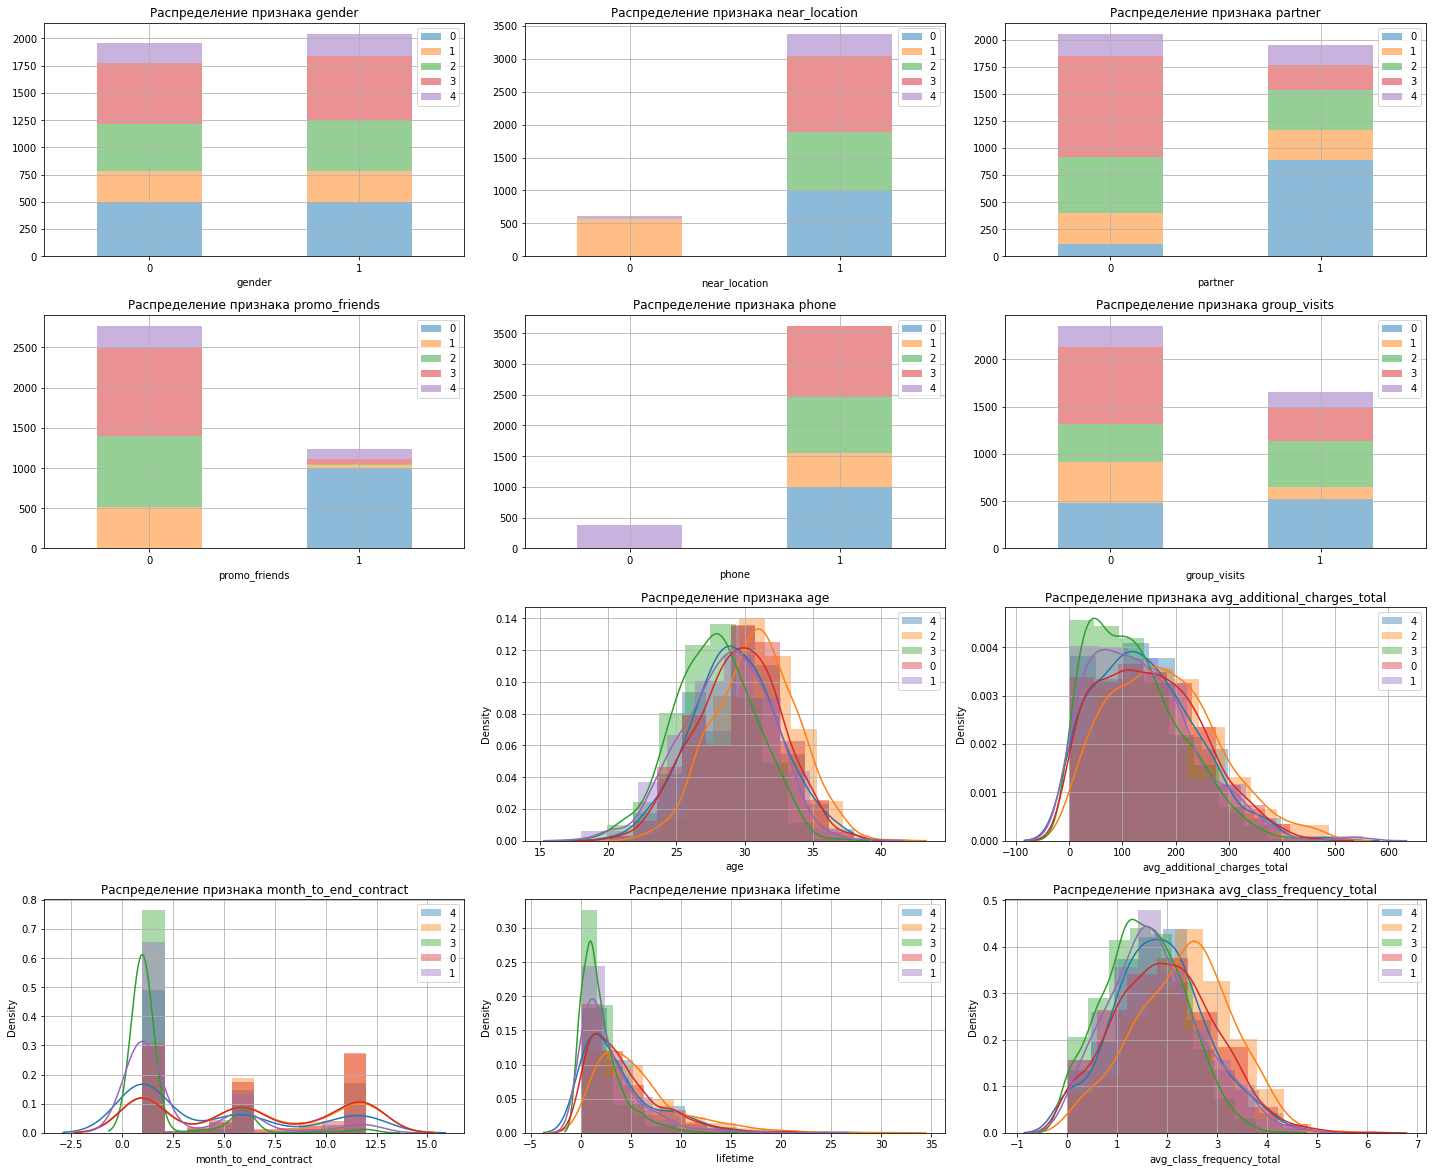

In [ ]:
# построим графики с разделением по кластерам
distr_attribut(df, 'clusters', df.drop('churn', axis=1).columns)

На графиках наглядно видно распределение признаков в разбивке по кластерам.

In [ ]:
# посчитаем долю оттока для каждого кластера
churn_share = df.groupby('clusters')['churn'].agg(['count','sum','mean']).reset_index()
churn_share['churn_share_total'] = churn_share['sum']/churn_share['count'].sum()
churn_share.columns=['clusters', 'count', 'churn_sum', 'shurn_share','churn_share_total']
churn_share.sort_values(by='churn_share_total', ascending=False)

,clusters,count,churn_sum,shurn_share,churn_share_total
3,3,1158,586,0.506045,0.14650
1,1,557,224,0.402154,0.05600
0,0,1001,133,0.132867,0.03325
4,4,386,103,0.266839,0.02575
2,2,898,15,0.016704,0.00375


Почти 51% клиентов кластера 3, 1,6% кластера 2 и 40% кластера 1 прекратили занятия в фитнес-центре. Почти 87% кластера 0 и 73% кластера 4 продолжают занятия.

## Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами.

Склонные к оттоку клиенты редко посещающают фитнес-центр, малая доля таких клиентов использовали промо-код от знакомого при оплате первого абонемента, редко посещали групповые занятия, приобрели абонемент на короткий период, и впервые пришли в фитнес-центр недавно. Возможно они оказались разочарованы в индивидуальных занятиях, было мало знакомых.  

Менее склонны к оттоку клиенты проживающие или работающие в районе расположения фитнес-центра, впервые пришли относительно недавно, но до окончания действия текущего абонемента в среднем чуть более 6 месяцев. Они также редко использовали промо-код знакомого при оплате текущего абонемента и только четверть из них посещают групповые занятия. Возможно по окончании текущего абонемента они также перестанут посещать фитнес, если не удержать их интересными предложениями.

Клиенты, посещающие фитнес-центр в среднем 5,7 месяца больше двух раз в неделю, проживающие или работающие в районе расположения центра практически не прерывают свои занятия.

Признаки скорого оттока клиента:
* редкие посещения тренировок
* приобретение первого абонемента на короткий срок
* клиент пришел не в рамках акции "приведи друга"
* посещение индивидуальных, а не групповых занятий.

Для удержания действующих и привлечения новых клиентов рекомендую:
* заключать больше договоров с компаниямии партнеров
* направить внимание на удержание клиентов не проживающих и не работающих в районе расположения фитнес-центра
* дополнительно стимулировать групповые занятия
* разработать взаимодействие в соцсетях для объединения клиентов
* проведение спортивных праздников в командных и индивидуальных зачетах с награждением победителей
* поддержание в хорошем состоянии не только инвентаря, но и помещений клуба для создания уютной атмосферы.